In [11]:
import zipfile
import os

# Get the current working directory
current_directory = os.getcwd()

# Construct the path to the zip file
zip_file_path = os.path.join(current_directory, 'Copy_of_devnagari_digit.zip')

# Define the directory to extract to
directory_to_extract_to = current_directory  # or any other desired directory

# Check if the file exists before attempting to open it
if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract the contents to the desired directory
        zip_ref.extractall(directory_to_extract_to)
else:
    print(f"Error: The zip file '{zip_file_path}' was not found.")

Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


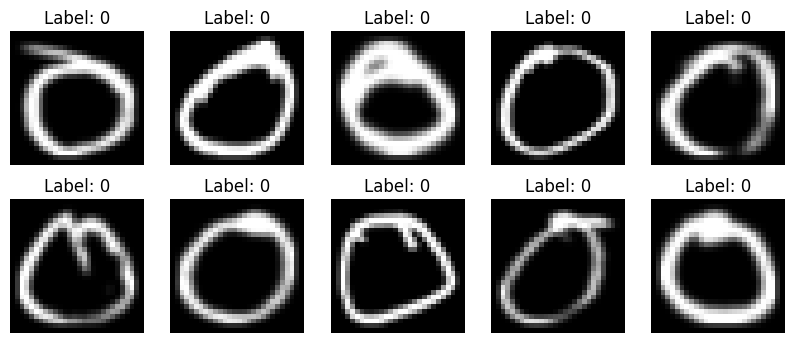

In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow

# Get the current working directory
current_directory = os.getcwd()

# Construct the path to the zip file
zip_file_path = os.path.join(current_directory, 'Copy_of_devnagari_digit.zip')

# Define the directory to extract to
directory_to_extract_to = current_directory  # or any other desired directory

# Check if the file exists before attempting to open it
if os.path.exists(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract the contents to the desired directory
        zip_ref.extractall(directory_to_extract_to)
else:
    print(f"Error: The zip file '{zip_file_path}' was not found.")

# Define dataset paths
train_dir = os.path.join(directory_to_extract_to, 'DevanagariHandwrittenDigitDataset', 'Train')
test_dir = os.path.join(directory_to_extract_to, 'DevanagariHandwrittenDigitDataset', 'Test')

# Define image size
img_height, img_width = 28, 28
# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder)) # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image using PIL
            img = Image.open(img_path).convert("L") # Convert to grayscale
            img = img.resize((img_width, img_height)) # Resize to (28,28)
            img = np.array(img) / 255.0 # Normalize pixel values to [0,1]
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)
# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

In [13]:
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
        keras.layers.Dense(64, activation="sigmoid"),
        keras.layers.Dense(128, activation="sigmoid"),
        keras.layers.Dense(256, activation="sigmoid"),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer="adam", # Stochastic Gradient Descent
    loss="categorical_crossentropy", # Loss function for multi-class classification
    metrics=["accuracy"] # Track accuracy during training
)

In [16]:
batch_size = 128
epochs = 20

#callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=1)
]

# Train the model with callbacks and validation split
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.3,
    callbacks=callbacks
)

Epoch 1/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.2577 - loss: 1.9089 - val_accuracy: 0.0000e+00 - val_loss: 7.4562
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7977 - loss: 0.6696 - val_accuracy: 0.0000e+00 - val_loss: 8.7545


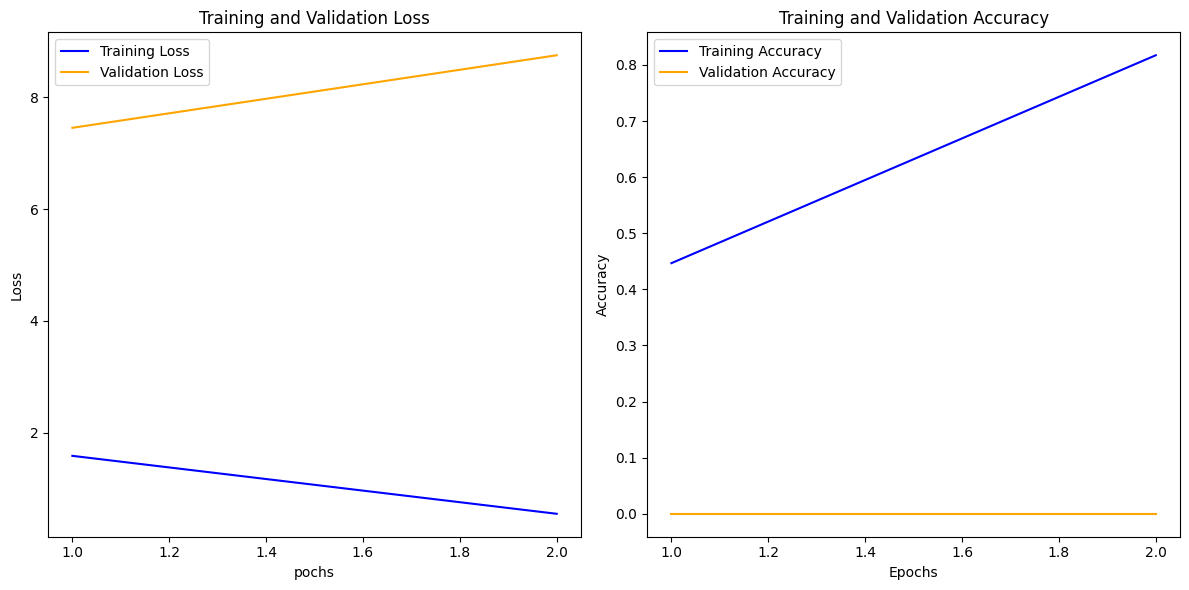

In [17]:
import matplotlib.pyplot as plt
# Assuming ’history’ is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('pochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.5820 - loss: 2.8989
Test accuracy: 0.5820


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


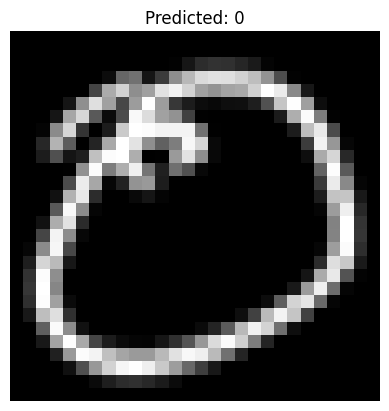

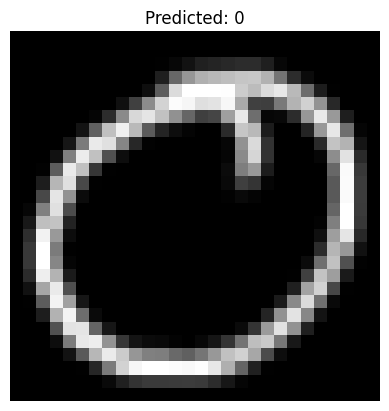

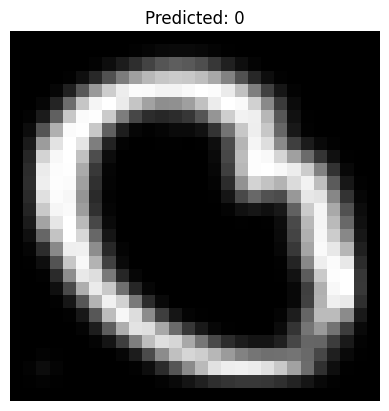

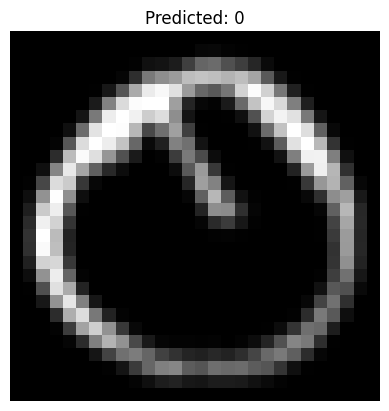

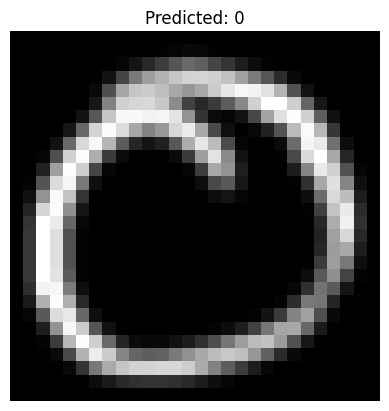

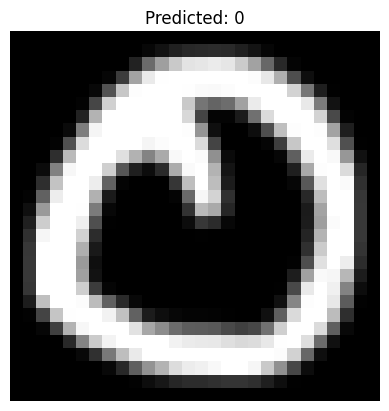

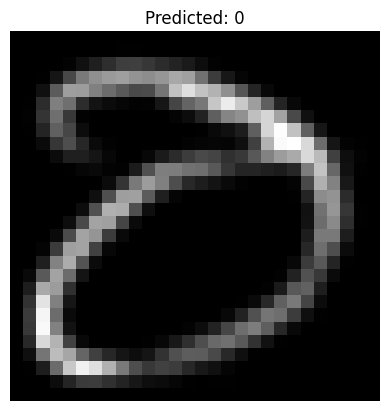

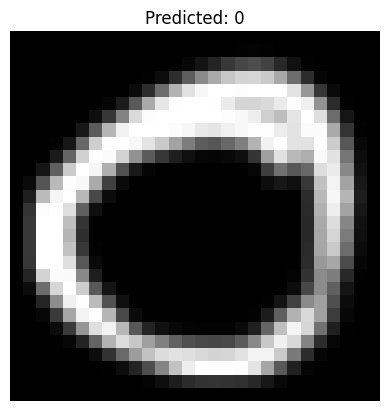

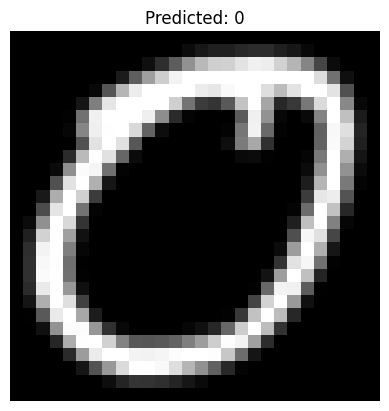

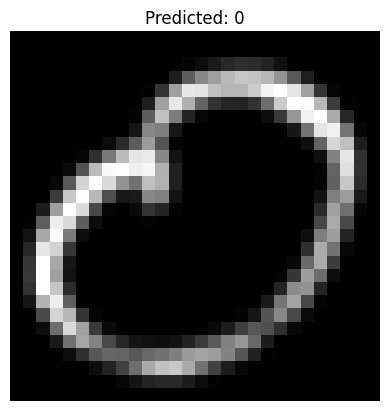

In [19]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis("off")

    plt.show()

In [20]:
model.save('mnist_fully_connected_model.h5')
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')